World Happiness Report Project
Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
df =pd.read_csv('happiness_score_dataset.csv')

In [62]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [63]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [64]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [65]:
df.shape

(158, 12)

In [66]:
df.duplicated().sum()

0

 Check Null values 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [68]:
# getting list of catergorical data types
catagorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        catagorical_cols.append(x)
print(f"Object datatype column are : \n ", catagorical_cols  )        

# getting list of numercal data types
numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64' or df.dtypes[x]=='int64' :
        numerical_cols.append(x)
print(f"Numercal datatype column are :\n",numerical_cols)        
            
    

Object datatype column are : 
  ['Country', 'Region']
Numercal datatype column are :
 ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


CHECKING NULL VALUES USING HEATMAP AND ISNULL 

In [69]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

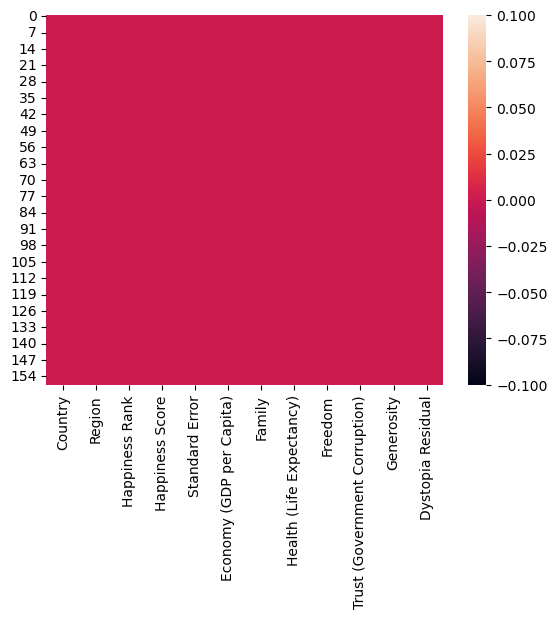

In [70]:
sns.heatmap(df.isnull())

as per our above  observation I am not getting any null value in given Dataset.
 

Statistical Summary

In [71]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


 we can see that some countries min values are 0. so let try to find country from bottom 

In [72]:
df.loc[df['Health (Life Expectancy)'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [73]:
df.loc[df['Economy (GDP per Capita)'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [74]:
df.loc[df['Freedom'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [75]:
df.loc[df['Trust (Government Corruption)'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


In [76]:
df.loc[df['Generosity'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


In [77]:
df.loc[df['Family'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


here we find out minimum performance of every category

Health (Life Expectancy) -Sierra Leone,
Economy (GDP per Capita)- Congo (Kinshasa),
Freedom - Iraq,
Family - Central African Republic,
Trust (Government Corruption) - Indonesia,
Generosity-  Greece

In [78]:
df['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [79]:
#value count of country column
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [80]:
#label encoder is use for labeling dataset that have catecorical column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through each categorical column
for i in catagorical_cols:
    # Encode the values in the column
    df[i] = le.fit_transform(df[i])

# Display the DataFrame after encoding
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


DATA VISUALIZATION

8    40
1    29
3    22
9    21
4    20
6     9
7     7
2     6
5     2
0     2
Name: Region, dtype: int64


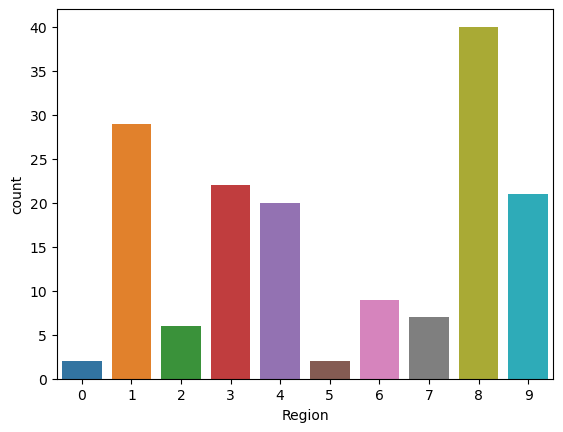

In [81]:
# for region
ax=sns.countplot(x='Region',data=df[catagorical_cols])
print(df['Region'].value_counts())

here we see that Region 8 has most country,  and region 0 ,5 have least country

to create a new dataframe for numerical data

In [82]:
dfnew = df[df.columns[1:]]
dfnew

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [83]:
dfnew.shape

(158, 11)

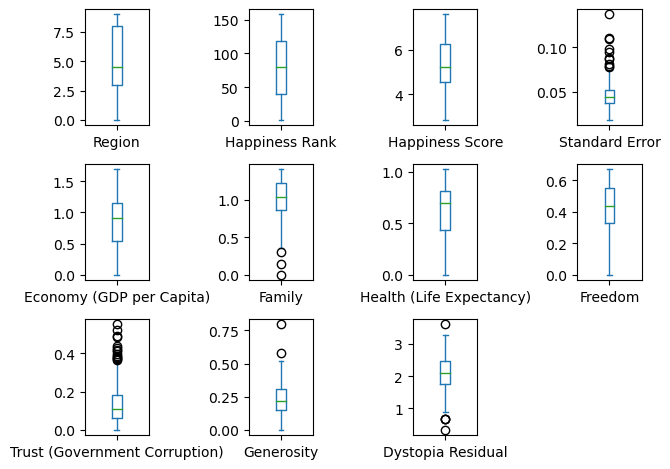

In [84]:
#CHECK outliers using box plot
dfnew.plot(kind ='box', subplots = True, layout=(3,4))

plt.tight_layout()

we see that there is some outliers present

In [85]:
# removing outliers use z score
from scipy.stats import zscore

z=np.abs(zscore(dfnew))
z

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.300256,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.300256,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.300256,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,0.040302,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.965117,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,0.965117,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,0.375441,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,0.965117,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [86]:
threshold=3
print(np.where(z>3))
df = dfnew[(z<3).all(axis=1)]

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))


In [87]:
dfnew = dfnew[(z<3).all(axis=1)]

In [88]:
X=dfnew.drop(columns =['Happiness Score'])
Y=dfnew['Happiness Score']

In [89]:
X.shape

(149, 10)

In [90]:
Y.shape

(149,)

Exploratory Data Analysis (EDA)

 Explorint continious columns
 
Skewness detection using distplot and skew(),

0.16973951104694993


<Axes: xlabel='Happiness Score', ylabel='Density'>

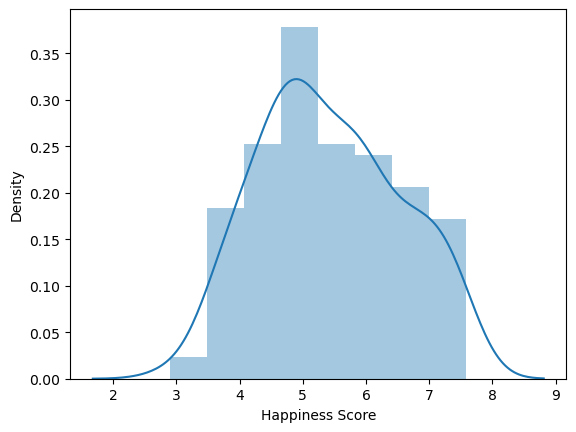

In [91]:
print(dfnew['Happiness Score'].skew())
sns.distplot(dfnew['Happiness Score'],kde=True)

1.243047961678629


<Axes: xlabel='Standard Error', ylabel='Density'>

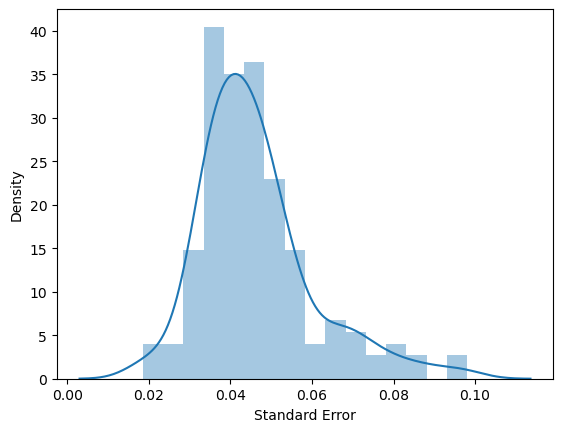

In [92]:
print(dfnew['Standard Error'].skew())
sns.distplot(dfnew['Standard Error'],kde=True)

-0.3906568832817616


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Density'>

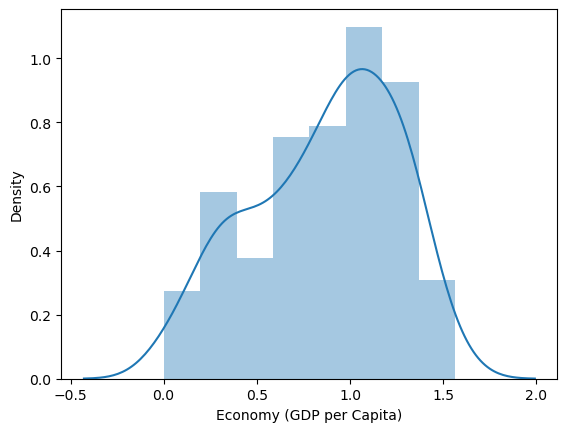

In [93]:
print(dfnew['Economy (GDP per Capita)'].skew())
sns.distplot(dfnew['Economy (GDP per Capita)'],kde=True)

-0.8113402316611611


<Axes: xlabel='Family', ylabel='Density'>

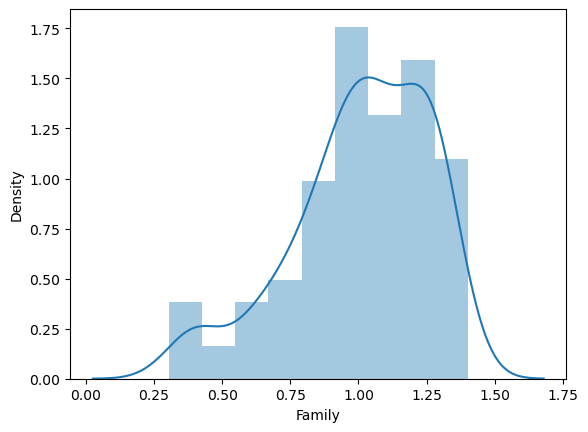

In [94]:
print(dfnew['Family'].skew())
sns.distplot(dfnew['Family'],kde=True)

insted of checking single feature  I am applying this to check skewness of all column

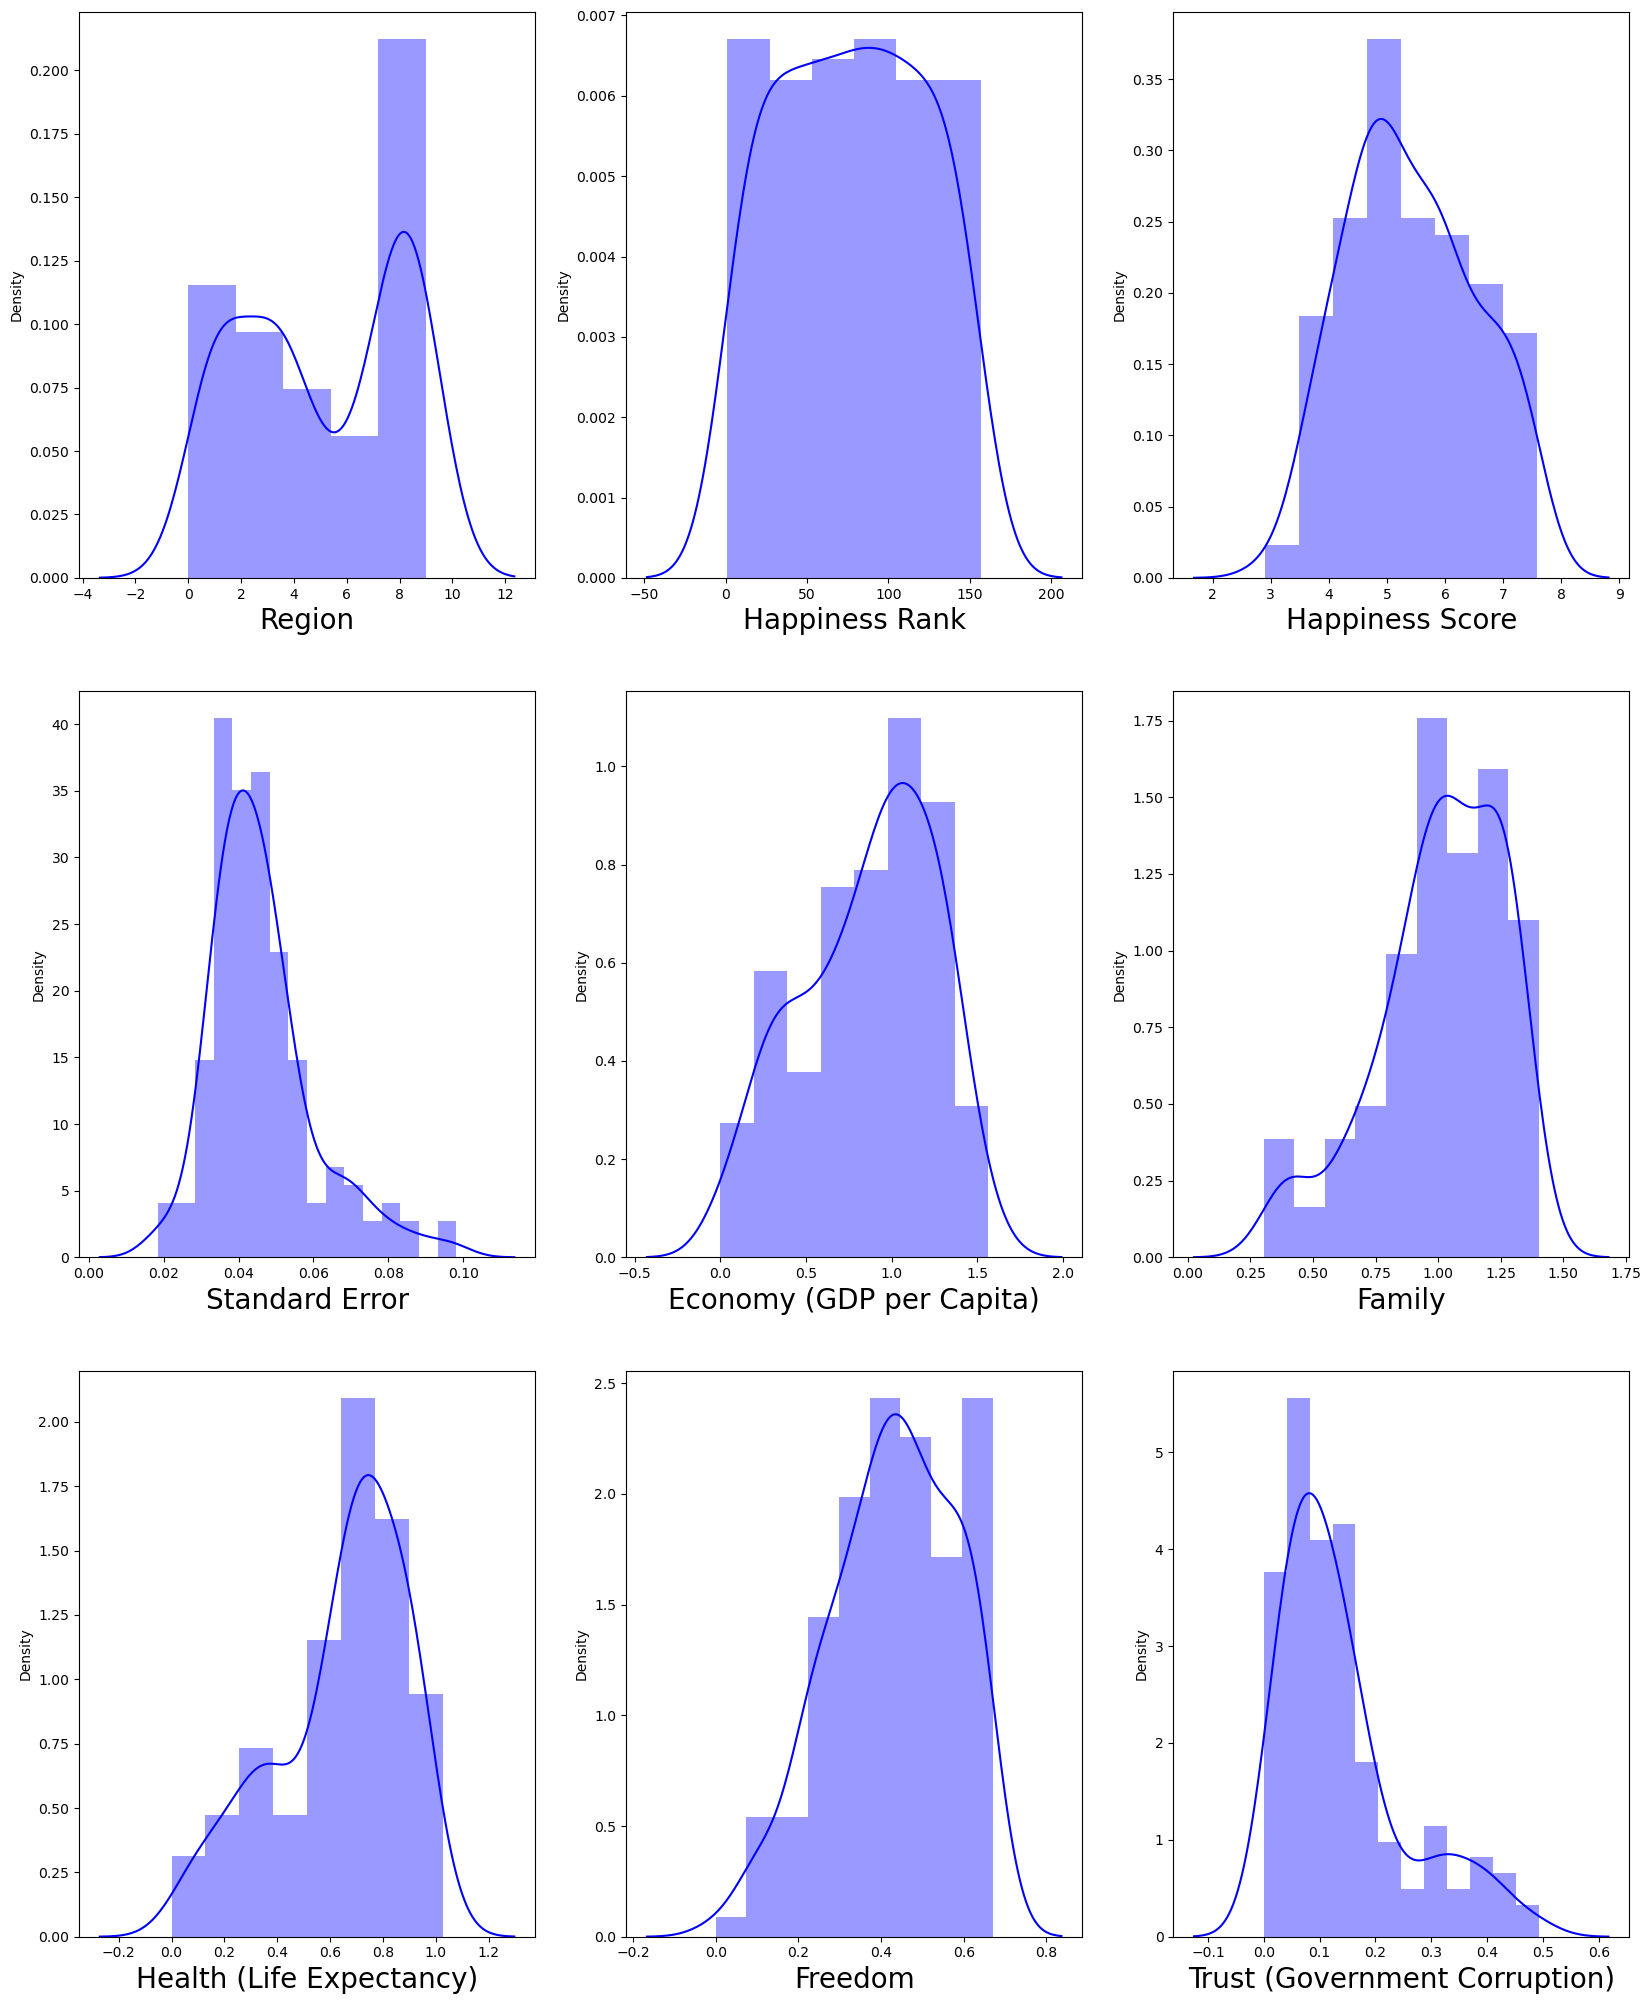

In [97]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in dfnew:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dfnew[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [98]:
df.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

BIVARIATE ANALYSIS (scatter plot)

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Family'>

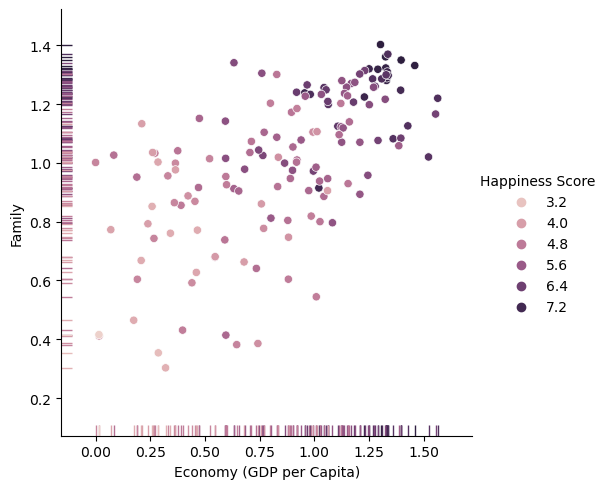

In [99]:
sns.relplot(data=df, x='Economy (GDP per Capita)',y='Family',hue='Happiness Score')
sns.rugplot(data=df, x='Economy (GDP per Capita)',y='Family',hue='Happiness Score',legend=False)

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

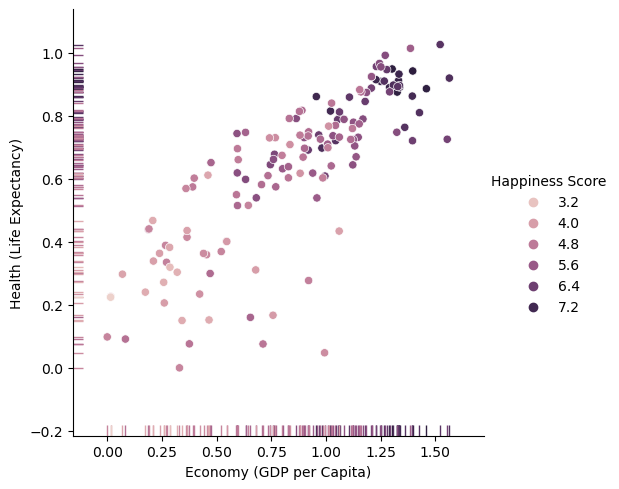

In [100]:
sns.relplot(data=df, x='Economy (GDP per Capita)',y='Health (Life Expectancy)',hue='Happiness Score')
sns.rugplot(data=df, x='Economy (GDP per Capita)',y='Health (Life Expectancy)',hue='Happiness Score',legend=False)

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Freedom'>

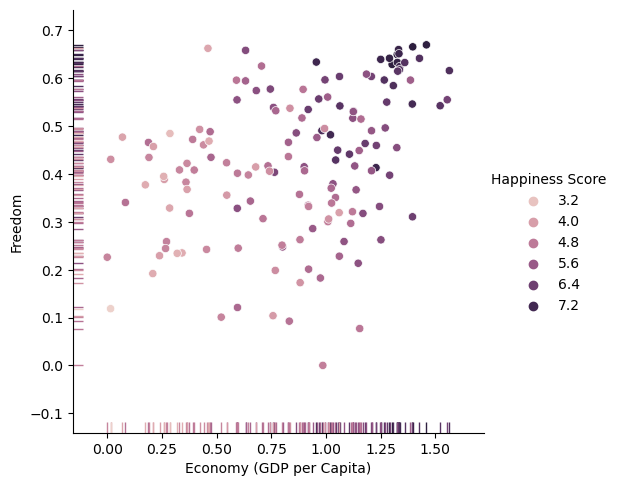

In [101]:
sns.relplot(data=df, x='Economy (GDP per Capita)',y='Freedom',hue='Happiness Score')
sns.rugplot(data=df, x='Economy (GDP per Capita)',y='Freedom',hue='Happiness Score',legend=False)

<Axes: xlabel='Trust (Government Corruption)', ylabel='Family'>

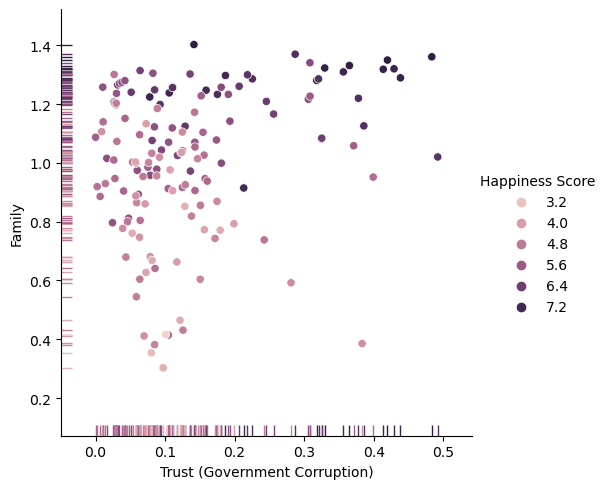

In [102]:
sns.relplot(data=df, x='Trust (Government Corruption)',y='Family',hue='Happiness Score')
sns.rugplot(data=df, x='Trust (Government Corruption)',y='Family',hue='Happiness Score',legend=False)

In [103]:
dfnew.skew()

Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

As per my obsevation  I found some skewness here. 
here some are left skewed and some are right skewd
left skewed- Standard Error, Trust (Government Corruption)   ,Generosity 

Right skewed-  family


In [104]:
from scipy.stats import boxcox
# 0 -> Log transform
# 0.5 -> square root trasform
dfnew['Standard Error']=boxcox(df['Standard Error'],0)


In [105]:
# checking skewness after applying boxcox

dfnew.skew()

Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Multicollinearity using Variance_inflation_factor

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

,vif,Features
0,5.541304,Region
1,5.701382,Happiness Rank
2,13.738159,Standard Error
3,28.115454,Economy (GDP per Capita)
4,30.686158,Family
5,28.137852,Health (Life Expectancy)
6,16.974657,Freedom
7,3.885435,Trust (Government Corruption)
8,7.021098,Generosity
9,14.751136,Dystopia Residual


<Axes: >

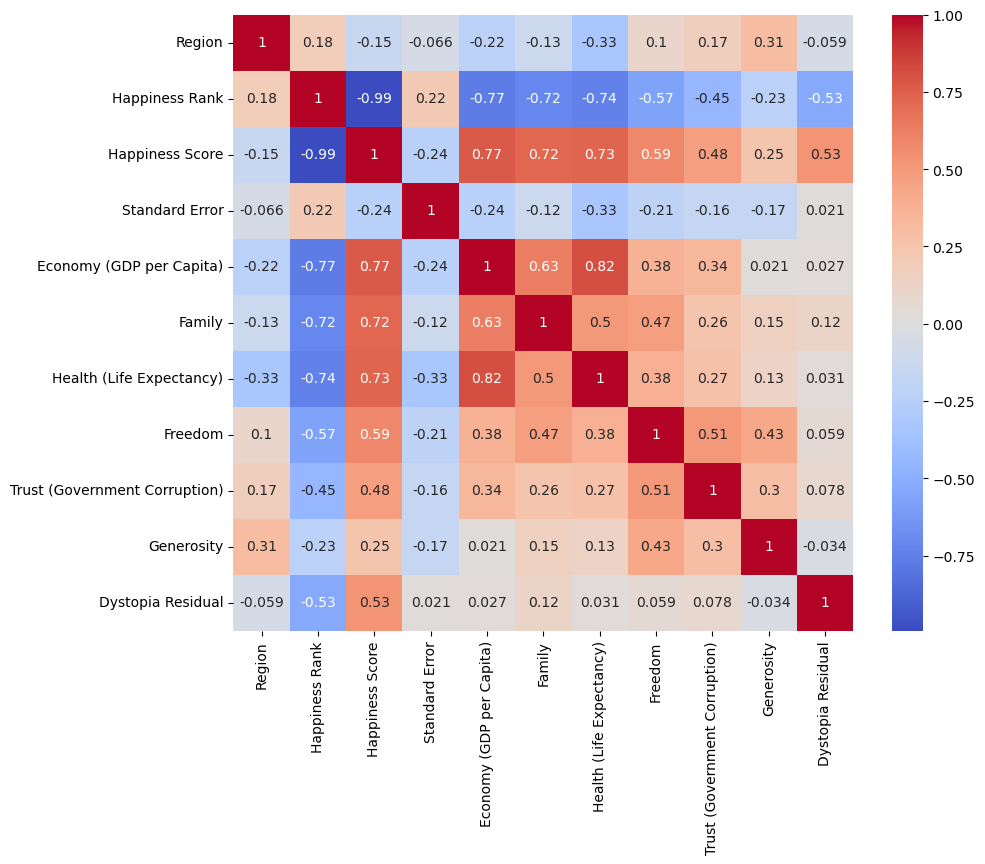

In [107]:
corr_df=dfnew.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,annot= True, cmap='coolwarm')

as per my observation i see that ther is multi coliniarity between economy , family and health.

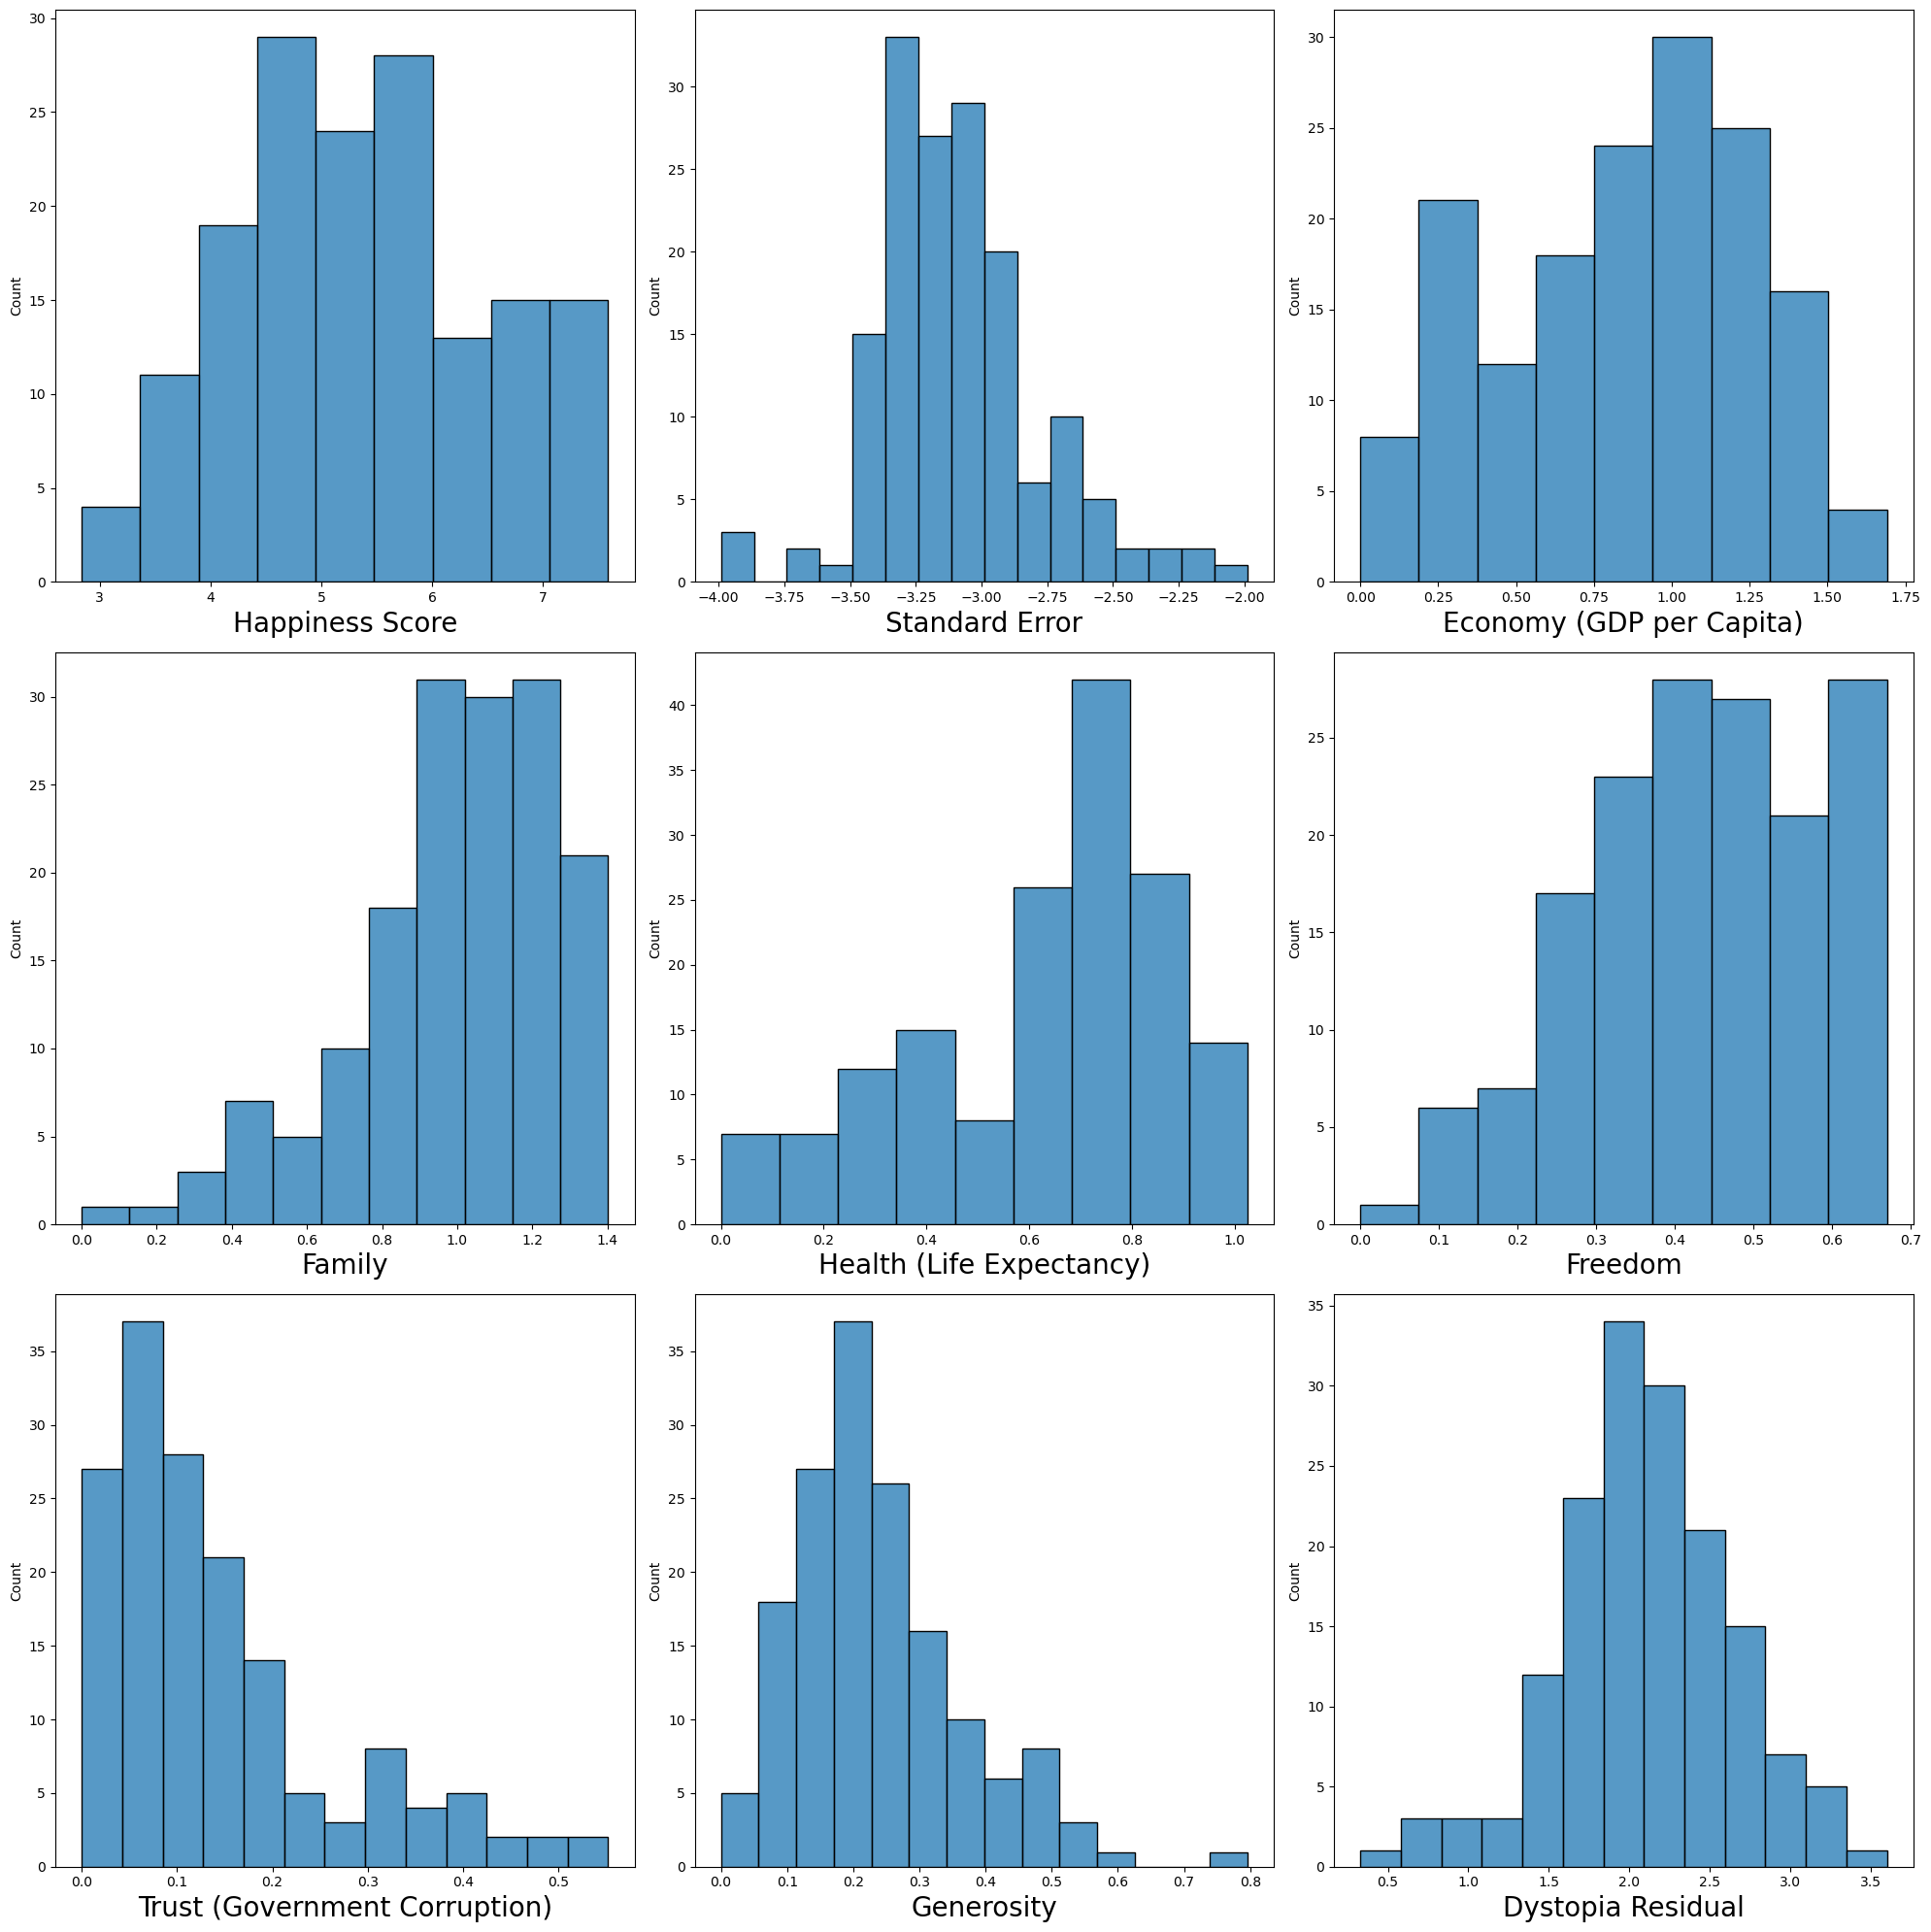

In [46]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in dfnew:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(dfnew[column], palette='Rainbow' )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

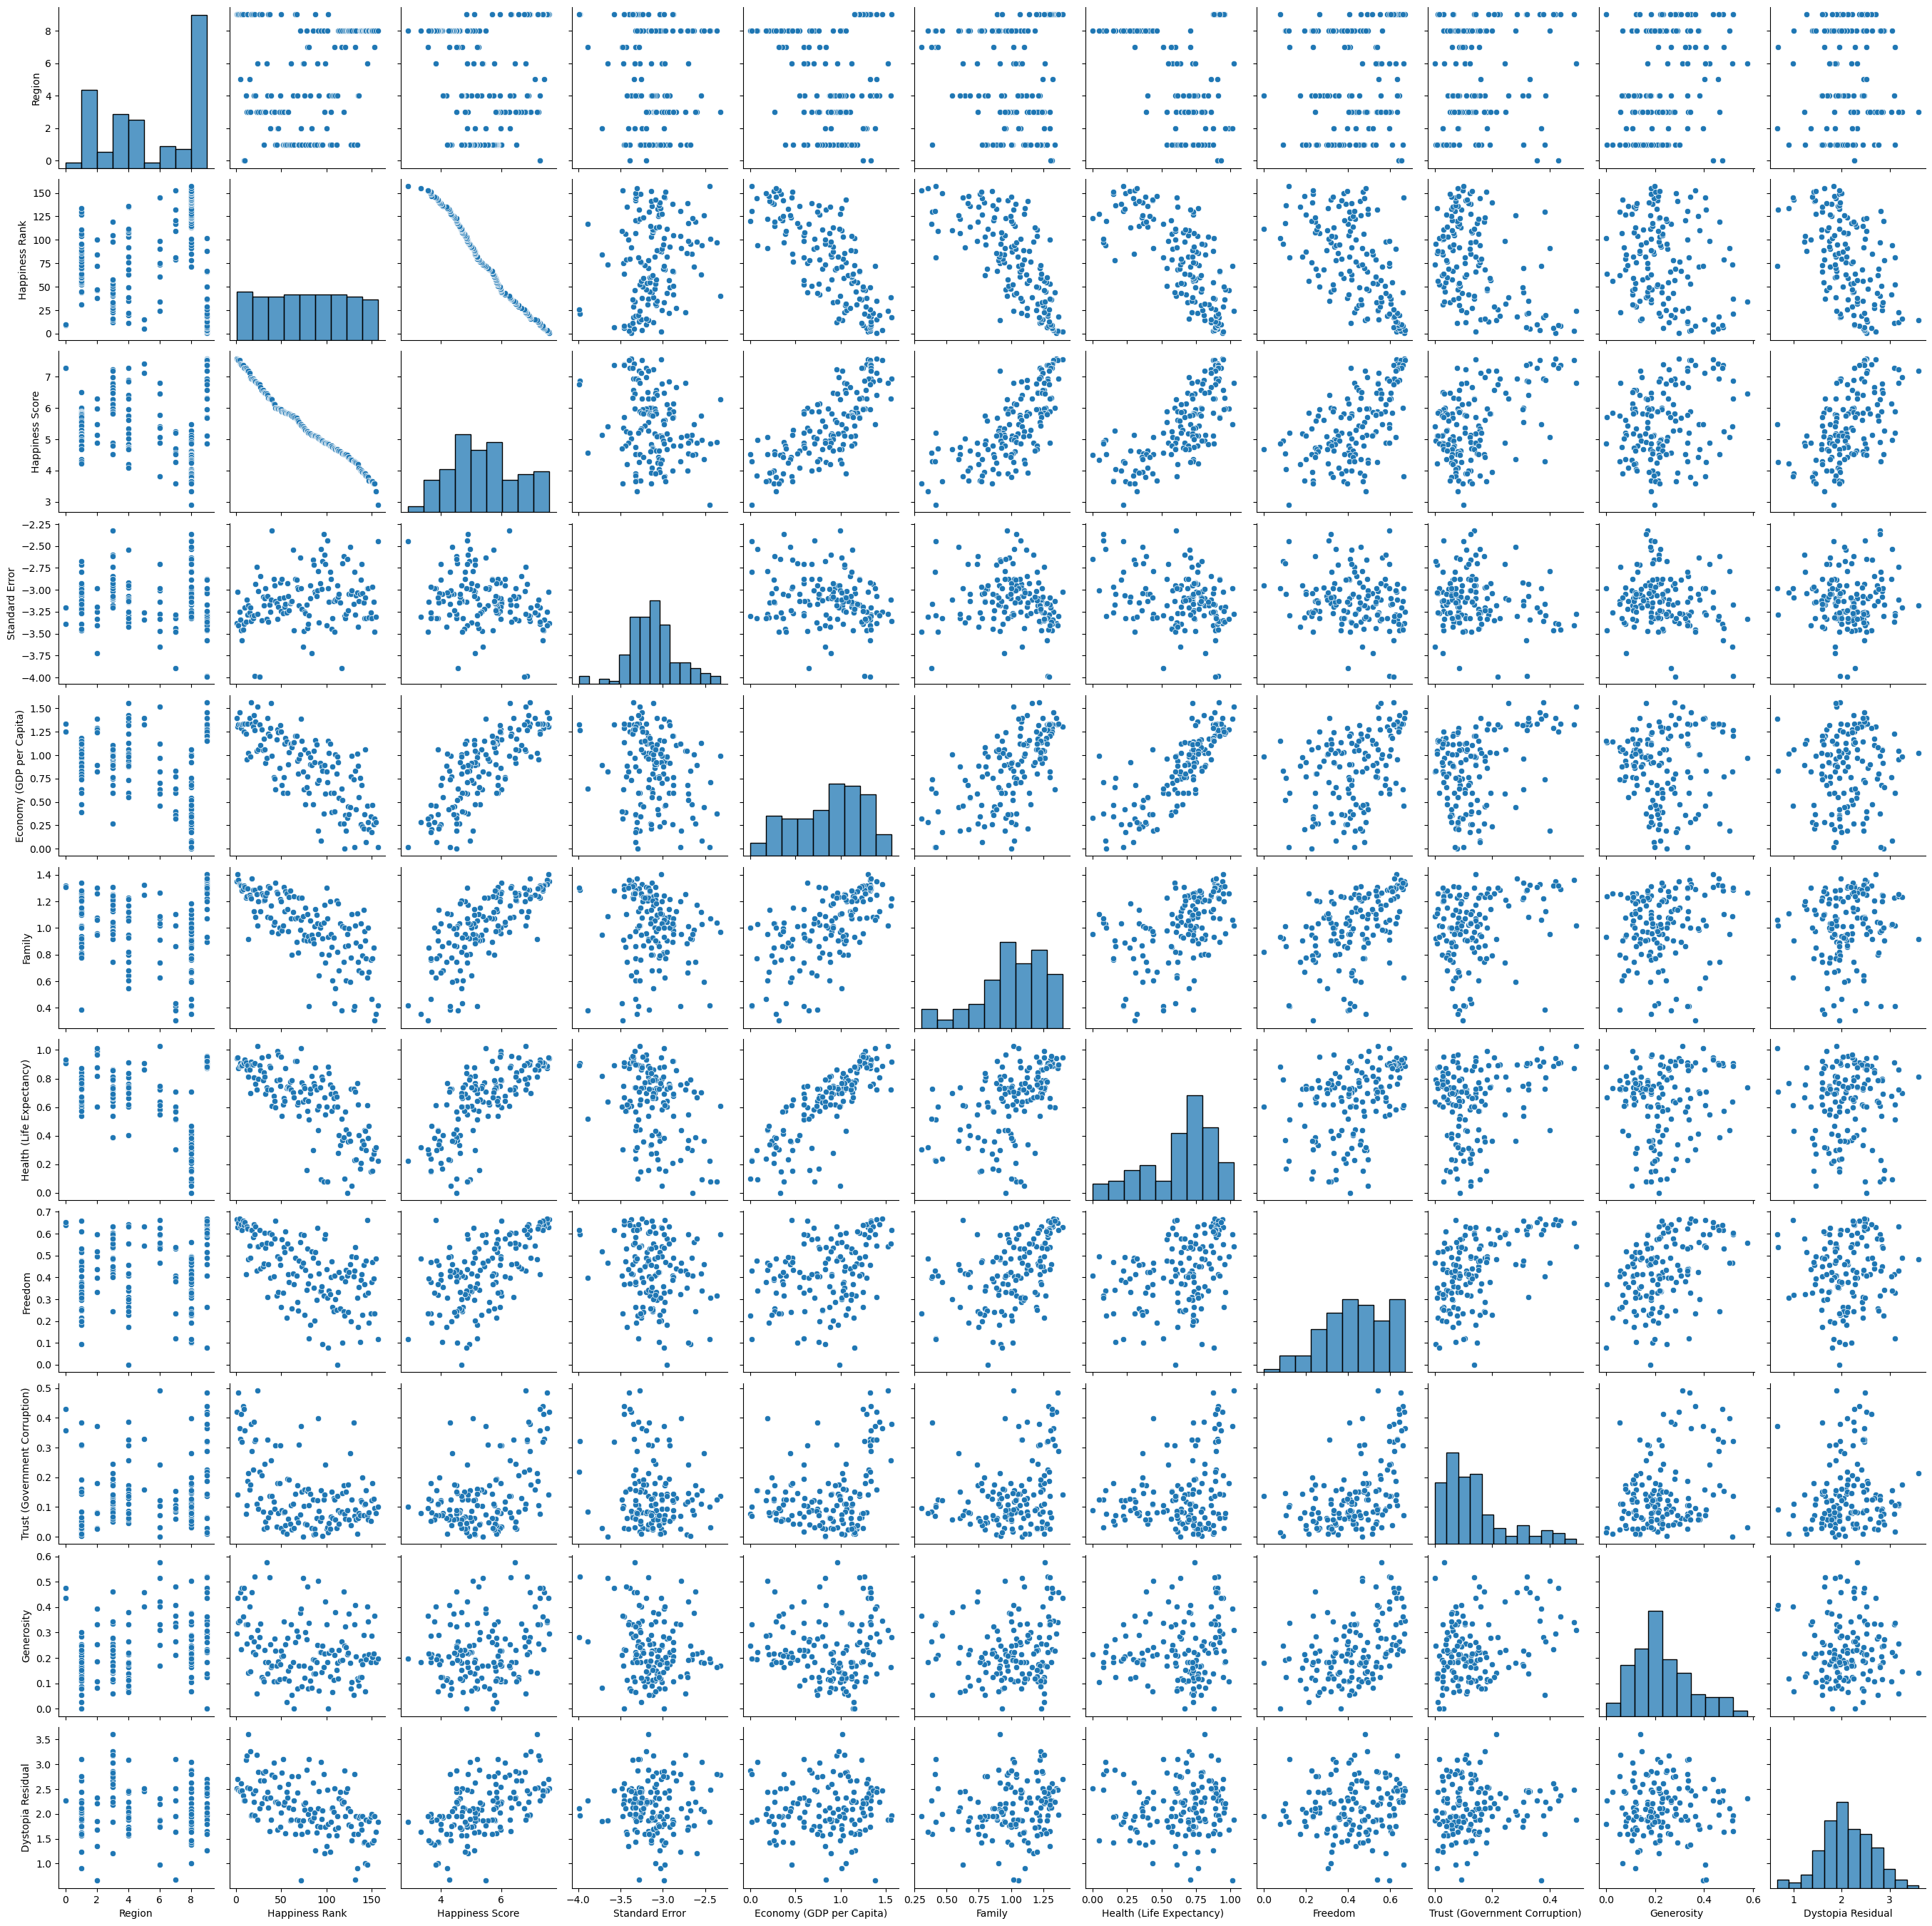

In [108]:
sns.pairplot(dfnew , palette='viridis')

Correlation between features

In [109]:
df.corr()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.184520,-0.145850,-0.013860,-0.224928,-0.127749,-0.334531,0.101335,0.167550,0.305791,-0.059494
Happiness Rank,0.184520,1.000000,-0.992921,0.212085,-0.773651,-0.720359,-0.736758,-0.571089,-0.445743,-0.225626,-0.526680
Happiness Score,-0.145850,-0.992921,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard Error,-0.013860,0.212085,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy (GDP per Capita),-0.224928,-0.773651,0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,-0.127749,-0.720359,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health (Life Expectancy),-0.334531,-0.736758,0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.101335,-0.571089,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust (Government Corruption),0.167550,-0.445743,0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080
Generosity,0.305791,-0.225626,0.250903,-0.131970,0.020730,0.154011,0.129328,0.428718,0.296450,1.000000,-0.034239


In [113]:
# Top 5 countries happiest countries

asc = df.sort_values(by='Happiness Score', ascending= False).head(5)
asc

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [114]:
# Bottom 5 countries happiest countries
dsc =df.sort_values(by='Happiness Score', ascending=True).head(5)
dsc

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
152,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723


In [118]:
Gr_Reg=df.groupby('Region')
Gr_Reg['Happiness Score'].describe().sort_values(by='mean', ascending=True).head(5)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
8,36.0,4.265528,0.574056,2.905,3.88325,4.3120,4.61575,5.477
7,7.0,4.580857,0.570526,3.575,4.39250,4.5650,4.94400,5.253
1,29.0,5.332931,0.570446,4.218,4.95900,5.2860,5.81300,6.505
6,8.0,5.443750,0.931334,3.819,5.02375,5.3795,5.94125,6.798
4,18.0,5.473389,0.962657,4.077,4.72100,5.2620,6.21125,7.278


MACHINE LEARNING

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix

In [120]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=43)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (99, 10)
Training target vector size: (99,)
Test feature matrix size: (50, 10)
Test target vector size: (50,)


Finding Best Random state

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score )
print('on Random state', maxRS)

Best accuracy is 0.9999999519362817
on Random state 117


In [122]:
#Splitting the data into Training data & Testing Data


print('size of X_test:',X_test.shape)
print('size of Y_train:',Y_train.shape)
print('size of Y_test:',Y_test.shape)

size of X_test: (50, 10)
size of Y_train: (99,)
size of Y_test: (50,)


In [129]:

models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f'Score is {model.score(X_test, Y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(Y_train, model.predict(X_train))}')
    print(f'Testing R-squared: {r2_score(Y_test, Y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}')
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
    

Training Model LR 
-----------------------------------------------
Score is 0.9999998982150691
Training R-squared: 0.9999999489867614
Testing R-squared: 0.9999998982150691
Mean Squared Error: 1.0921883406515015e-07
Mean Absolute Error: 0.000285813979837668
Root Mean Squared Error: 0.0003304827288454726
Training Model RF 
-----------------------------------------------
Score is 0.9909735929074305
Training R-squared: 0.9996178561969142
Testing R-squared: 0.9909735929074305
Mean Squared Error: 0.00968565434513819
Mean Absolute Error: 0.04139585151515161
Root Mean Squared Error: 0.09841572204245717
Training Model DT 
-----------------------------------------------
Score is 0.9849927784302364
Training R-squared: 1.0
Testing R-squared: 0.9849927784302364
Mean Squared Error: 0.016103279999999998
Mean Absolute Error: 0.06467999999999993
Root Mean Squared Error: 0.1268986997569321
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.9907429194216257
Traini

We can see that Linear Regression Model Gives us maximum R2 Score

In [124]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv = 5)
print("Cross Validation Score :")
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :
Score : [0.99999912 0.99999859 0.99999818 0.99999535 0.99999925]
Mean Score : 0.9999980987465694
Std deviation : 1.4245914734171059e-06


In [125]:
#Linear Regression

# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(X_train, Y_train)
LinearRegression()

LinearRegression()

In [130]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv = 5)
print('Cross Validation Score :')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :
Score : [0.99999912 0.99999859 0.99999818 0.99999535 0.99999925]
Mean Score : 0.9999980987465694
Std deviation : 1.4245914734171059e-06


In [132]:
import pickle
filename='happyness score.pk1'
# Assuming 'filename' is the path to the file where you want to save the model
filename='happyness score.pk1'
# Dump the RandomForestClassifier model to a file
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)
